In [2]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
#Create the time grid
T = 100.0 # length of the time-interval
dt = 0.02 # time-step size
N = int(T/dt) + 1 # number of time steps
t = np.linspace(0.0, T, num=N) # time grid

In [17]:
# Set the initial conditions
z0 = 100.0 # altitude
b0 = 10.0 # upward velocity resulting from gust
zt = 100.0 # trim altitude
g = 9.81 # acceleration due to gravity

# Set the initial value of the numerical solution
u = np.array([z0, b0])

# Create an array to store the elevation value at each time step
z = np.zeros(N)
z[0] = z0

In [18]:
# Temporal integration using Euler's Method
#
#   z_new = z_old + dt * b_old
#   b_new = b_old + dt * g(1 - z_old / zt)
#
# z and b are getting stored in u at every time step
# And are used to calculate the new z and b

for n in range(1, N):
    rhs = np.array([u[1], g * (1 - u[0] / zt)])
    u = u + dt * rhs
    z[n] = u[0]

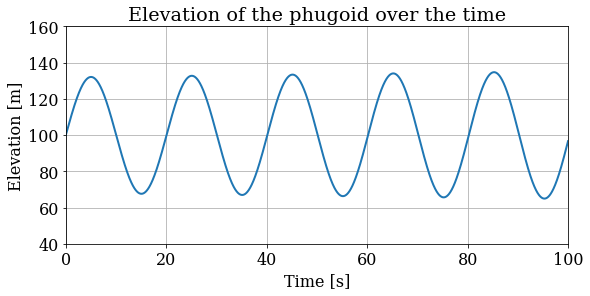

In [19]:
# Set the font family and size to use the Matplotlib figures.
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16
# Plot the solution of the elevation.
plt.figure(figsize=(9.0,4.0)) # set the size of the figure
plt.title('Elevation of the phugoid over the time') # set the title
plt.xlabel('Time [s]') # set the x-axis label
plt.ylabel('Elevation [m]') # set the y-axis label
plt.xlim(t[0],t[-1]) # set the x-axis limits
plt.ylim(40.0, 160.0) # set the y-axis limits
plt.grid() # set the background grid to improve readability
plt.plot(t,z, color='C0', linestyle='-', linewidth=2)

In [37]:
# Larger gust of wind (b0=20.0)
z0 = 100.0 # altitude
b0 = 20.0 # upward velocity resulting from gust
zt = 100.0 # trim altitude
g = 9.81 # acceleration due to gravity

# Set the initial value of the numerical solution
u = np.array([z0, b0])

# Create an array to store the elevation value at each time step
z = np.zeros(N)
z[0] = z0


In [38]:
for n in range(1, N):
    rhs = np.array([u[1], g * (1 - u[0] / zt)])
    u = u + dt * rhs
    z[n] = u[0]

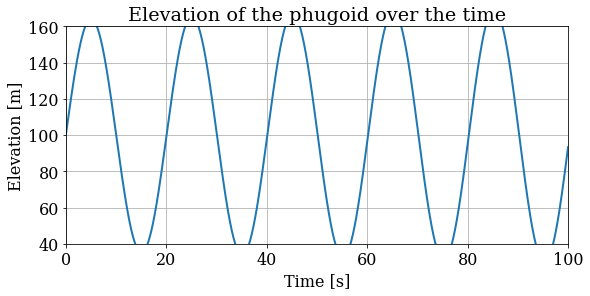

In [40]:
# Set the font family and size to use the Matplotlib figures.
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16
# Plot the solution of the elevation.
plt.figure(figsize=(9.0,4.0)) # set the size of the figure
plt.title('Elevation of the phugoid over the time') # set the title
plt.xlabel('Time [s]') # set the x-axis label
plt.ylabel('Elevation [m]') # set the y-axis label
plt.xlim(t[0],t[-1]) # set the x-axis limits
plt.ylim(40.0, 160.0) # set the y-axis limits
plt.grid() # set the background grid to improve readability
plt.plot(t,z, color='C0', linestyle='-', linewidth=2)

In [41]:
# When no wind (b0 =0.0)
z0 = 100.0 # altitude
b0 = 0.0 # upward velocity resulting from gust
zt = 100.0 # trim altitude
g = 9.81 # acceleration due to gravity

# Set the initial value of the numerical solution
u = np.array([z0, b0])

# Create an array to store the elevation value at each time step
z = np.zeros(N)
z[0] = z0

In [42]:
for n in range(1,N):
    rhs = np.array([u[1], g * (1 - u[0] / zt)])
    u = u + dt * rhs
    z[n] = u[0]

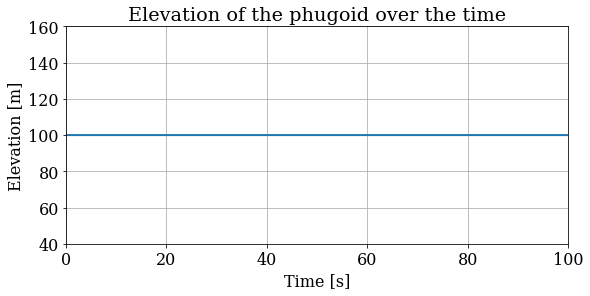

In [43]:
# Set the font family and size to use the Matplotlib figures.
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16
# Plot the solution of the elevation.
plt.figure(figsize=(9.0,4.0)) # set the size of the figure
plt.title('Elevation of the phugoid over the time') # set the title
plt.xlabel('Time [s]') # set the x-axis label
plt.ylabel('Elevation [m]') # set the y-axis label
plt.xlim(t[0],t[-1]) # set the x-axis limits
plt.ylim(40.0, 160.0) # set the y-axis limits
plt.grid() # set the background grid to improve readability
plt.plot(t,z, color='C0', linestyle='-', linewidth=2)

In [20]:
# Exact solution
z_exact = (b0 * (zt / g)**0.5 * np.sin((g / zt)**0.5 * t) +
          (z0 - zt) * np.cos((g / zt)**0.5 * t) + zt)

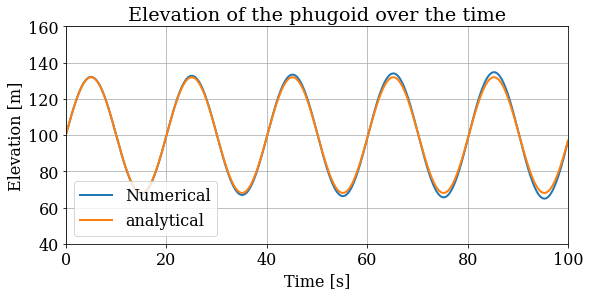

In [21]:
# Plot the numerical solution and the exact solution
plt.figure(figsize=(9.0,4.0)) # set the size of the figure
plt.title('Elevation of the phugoid over the time') # set the title
plt.xlabel('Time [s]') # set the x-axis label
plt.ylabel('Elevation [m]') # set the y-axis label
plt.xlim(t[0],t[-1]) # set the x-axis limits
plt.ylim(40.0, 160.0) # set the y-axis limits
plt.grid() # set the background grid to improve readability
plt.plot(t,z, label ='Numerical', color='C0', linestyle='-', linewidth=2)
plt.plot(t,z_exact, label='analytical', color='C1', linestyle='-', linewidth=2)
plt.legend()

In [24]:
# Convergence

# Set the list of time-step sizes.
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]

# Create an empty list that will contain the solution of each grid.
z_values = []

for dt in dt_values:
    N = int(T / dt) + 1 # Number of time steps
    t = np.linspace(0.0, T, num=N) # time grid

    # Set the initial conditions.
    u = np.array([z0, b0])
    z = np.empty_like(t)
    z[0] = z0
    # Temporal integration using Euler's method.
    for n in range(1,N):
        rhs = np.array([u[1], g * (1 - u[0] / zt)])
        u = u + dt * rhs
        z[n] = u[0] # store the elevation at time-step n+1
    z_values.append(z) # store the elevation over the time

In [25]:
def l1_error(z, z_exact, dt):
    """
    Computes and returns the error
    (between the numerical and exact solutions)
    in the L1 form.

    Parameters
    ----------
    z : np.ndarray
        The numeircal solution as an array of floats.
    z_exact : np.ndarray
        The analytical solution as an array of floats.
    dt : float
        The time-step size.

    Returns
    -------
    error : float
        L1-norm of the error with respect to the exact solution.
    """
    error = dt * np.sum(np.abs(z - z_exact))
    return error

In [26]:
# Iterate through each dt and calculate the corresponding error.

# Create an empty list to store the errors on each time grid.
error_values = []

for z, dt in zip(z_values, dt_values):
    N = int(T/dt) + 1
    t = np.linspace(0.0, T, num=N)
    # Compute the exact solution.
    z_exact = (b0 *(zt / g)**0.5 * np.sin((g / zt)**0.5 * t) +
              (z0 - zt) * np.sin((g / zt)**0.5 * t) + zt)
    # Calculate the L1-norm of the error for the present time grid.
    error_values.append(l1_error(z, z_exact, dt))

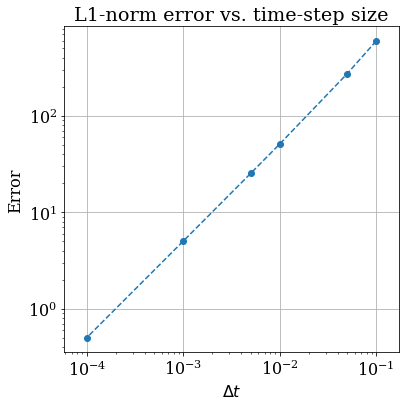

In [28]:
# Plot the error versus the time-step size.
plt.figure(figsize=(6.0, 6.0))
plt.title('L1-norm error vs. time-step size')
plt.xlabel('$\Delta t$')
plt.ylabel('Error')
plt.grid()
plt.loglog(dt_values, error_values, color='C0', linestyle='--', marker='o')
plt.axis('equal');

In [30]:
# Function for Euler's method
def euler_step(u, rhs, dt):
    u_new = u + dt * rhs
    return u_new